In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import sys
pd.set_option('display.max_columns', None)

src_path = os.path.abspath(os.path.join(os.getcwd(), "../../../src"))
sys.path.append(src_path)
from pipeline import ModelPipeline


In [2]:
xgb_pipeline = ModelPipeline(dataset_path='/Users/abhitay/Developer/Columbia_projects/CAP/dsi-capstone-spring-2025-TD-anti-money-laundering/Code/Abhitay/IBM/Subset Transactions.csv')

xgb_pipeline.run_preprocessing()

xgb_pipeline.df

Running preprocessing pipeline...

Creating unique ids...

Normalizing currency...

Extracting time features...

Adding cyclical encoding to time feats...

Applying label encoding...

Label encoding applied to columns: ['day_of_week', 'from_bank', 'to_bank']

Extracting graph features...

Using default weight columns: ['sent_amount', 'received_amount']

Graph features computed using: ['sent_amount', 'received_amount']

**Note**, previously graph-based features were calculated using only `sent_amount` as edge weight (only based on 
outgoing transactions). Now both sent and received amounts are included by default.

New feature columns added: degree_centrality_sent_amount, degree_centrality_received_amount, 
pagerank_sent_amount, pagerank_received_amount

Preprocessing completed successfully!

{
    'renamed': True,
    'duplicates_removed': True,
    'unique_ids_created': True,
    'currency_normalized': True,
    'time_features_extracted': True,
    'cyclical_encoded': True,
    'weekend_encoded': True,
    'label_encoded': True,
    'neighbor_context_computed': True,
    'normalized': False
}

,from_bank,to_bank,received_amount,received_currency,sent_amount,sent_currency,payment_type,is_laundering,from_account_id,to_account_id,from_account_idx,to_account_idx,sent_amount_usd,received_amount_usd,hour_of_day,day_of_week,seconds_since_midnight,timestamp_int,timestamp_scaled,day_sin,day_cos,time_of_day_sin,time_of_day_cos,is_weekend,degree_centrality_sent_amount,pagerank_sent_amount,degree_centrality_received_amount,pagerank_received_amount
0,8,8,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0,10_8000EBD30,10_8000EBD30,0,0,3.697340e+03,3.697340e+03,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.000139,0.000050,0.000139,0.000050
1,109,0,0.010000,US Dollar,0.010000,US Dollar,Cheque,0,3208_8000F4580,1_8000F5340,1,81239,1.000000e-02,1.000000e-02,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.000019,0.000001,0.000019,0.000001
2,10,10,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0,12_8000F5030,12_8000F5030,2,2,2.806970e+03,2.806970e+03,0,3,120,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.008727,0.999962,0,0.000195,0.000243,0.000195,0.000243
3,8,8,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0,10_8000F5200,10_8000F5200,3,3,3.668297e+04,3.668297e+04,0,3,360,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.026177,0.999657,0,0.000121,0.000008,0.000121,0.000008
4,0,0,6162.440000,US Dollar,6162.440000,US Dollar,Reinvestment,0,1_8000F5AD0,1_8000F5AD0,4,4,6.162440e+03,6.162440e+03,0,3,180,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.013090,0.999914,0,0.000177,0.000092,0.000177,0.000092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250896,4222,3797,0.000223,Bitcoin,0.000223,Bitcoin,Bitcoin,0,152627_813D6AFF1,53744_814237D21,48362,48634,1.876695e-08,1.876695e-08,23,5,85260,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.082808,0.996566,1,0.000046,0.000007,0.000046,0.000007
1250897,4672,4671,0.417737,Bitcoin,0.417737,Bitcoin,Bitcoin,0,254565_8147A3EC1,254355_8147A3E21,48834,75038,3.515537e-05,3.515537e-05,23,5,84720,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.121869,0.992546,1,0.000037,0.000003,0.000037,0.000003
1250898,12,4222,0.051436,Bitcoin,0.051436,Bitcoin,Bitcoin,0,15_813D8E211,152627_8147AA0B1,48375,69359,4.328685e-06,4.328685e-06,23,5,85860,1.662854e+09,1.662854e+09,-0.974928,-0.222521,-0.039260,0.999229,1,0.000046,0.000030,0.000046,0.000030
1250899,12,4222,0.084692,Bitcoin,0.084692,Bitcoin,Bitcoin,0,15_813D8E211,152627_8147AA0B1,48375,69359,7.127401e-06,7.127401e-06,23,5,85200,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.087156,0.996195,1,0.000046,0.000030,0.000046,0.000030


In [3]:
df = xgb_pipeline.df.copy()

In [7]:
df['from_bank'].value_counts()

24      121017
8        34835
10       33305
0        28333
43       18423
         ...  
1804         1
2220         1
6554         1
3007         1
4227         1
Name: from_bank, Length: 10962, dtype: int64

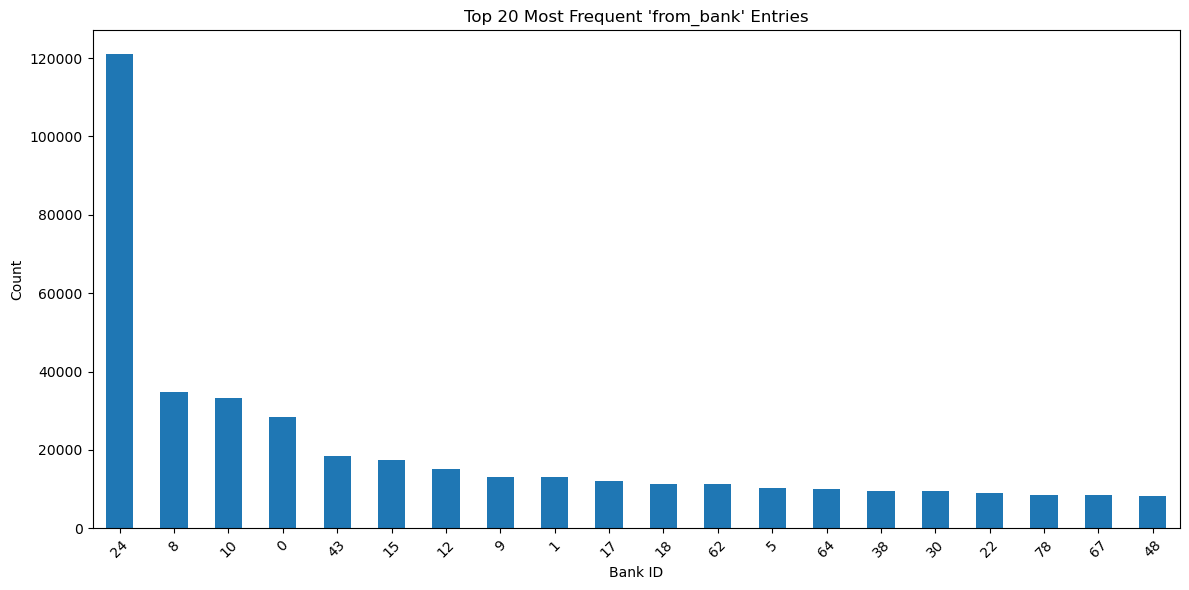

In [8]:
import matplotlib.pyplot as plt

# Assuming this is a Series called from_bank_counts
from_bank_counts = df['from_bank'].value_counts()

# Plot top 20 most frequent banks
top_n = 20
from_bank_counts.head(top_n).plot(kind='bar', figsize=(12, 6))

plt.title("Top 20 Most Frequent 'from_bank' Entries")
plt.xlabel("Bank ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


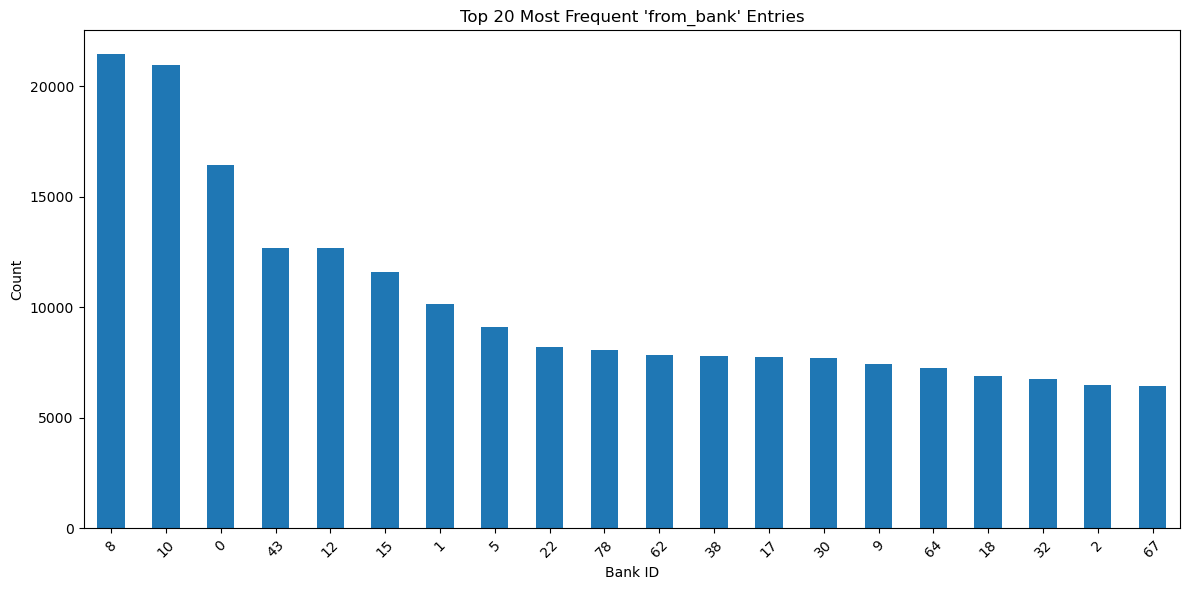

In [9]:
import matplotlib.pyplot as plt

# Assuming this is a Series called from_bank_counts
from_bank_counts = df['to_bank'].value_counts()

# Plot top 20 most frequent banks
top_n = 20
from_bank_counts.head(top_n).plot(kind='bar', figsize=(12, 6))

plt.title("Top 20 Most Frequent 'from_bank' Entries")
plt.xlabel("Bank ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# Group by from_bank and calculate laundering rate
laundering_ratio = df.groupby('from_bank')['is_laundering'].mean()

# Find banks with laundering ratio > 0.20
sussy_banks = laundering_ratio[laundering_ratio > 0.10].index

# Create new column: True if the bank is sussy
df['from_sussy_bank'] = df['from_bank'].isin(sussy_banks)


In [28]:
# Group by from_bank and calculate laundering rate
laundering_ratio = df.groupby('to_bank')['is_laundering'].mean()

# Find banks with laundering ratio > 0.20
sussy_banks = laundering_ratio[laundering_ratio > 0.10].index

# Create new column: True if the bank is sussy
df['to_sussy_bank'] = df['to_bank'].isin(sussy_banks)


In [29]:
df['from_sussy_bank'].value_counts()

False    1249784
True        1117
Name: from_sussy_bank, dtype: int64

In [30]:
df['to_sussy_bank'].value_counts()

False    1250631
True         270
Name: to_sussy_bank, dtype: int64